#Clustering

###1.Loading and Preprocessing
The Iris dataset contains four features: sepal length, sepal width, petal length, and petal width.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [26]:
#Load the dataset
iris = load_iris()
X = iris.data  #Features: Sepal Length, Sepal Width, Petal Length, Petal Width
feature_names = iris.feature_names

In [27]:
#Convert to DataFrame for a quick look
df = pd.DataFrame(X, columns=feature_names)
print("Preprocessing complete. Species column dropped.")
df.head()

Preprocessing complete. Species column dropped.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##2.KMeans Clustering
###How it works:
KMeans is a centroid-based algorithm. It randomly assigns $k$ center points, then iteratively assigns each data point to the nearest center and recalculates the center (mean) until the clusters stabilize.
###Suitability:
It is ideal for the Iris dataset because the features are numerical and the clusters are relatively spherical and well-separated.

In [28]:
#Apply KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

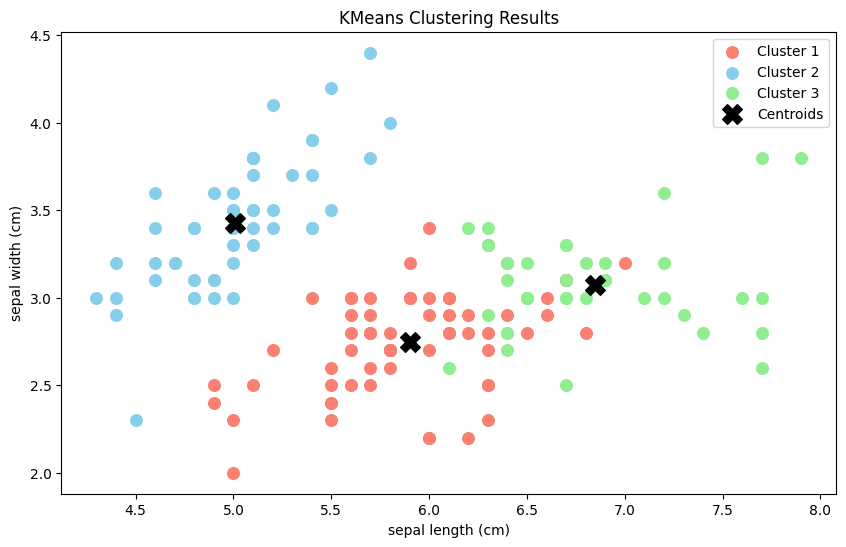

In [29]:
#Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=70, c='salmon', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=70, c='skyblue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=70, c='lightgreen', label='Cluster 3')

#Plotting Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title('KMeans Clustering Results')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

##3. Hierarchical Clustering
###How it works:
Agglomerative clustering is a "bottom-up" approach where each data point starts as its own cluster. The algorithm repeatedly merges the two closest clusters until only one (or a specified number) remains.

###Suitability:
It is useful for biological data like Iris because it reveals the taxonomic hierarchy between samples through a Dendrogram.

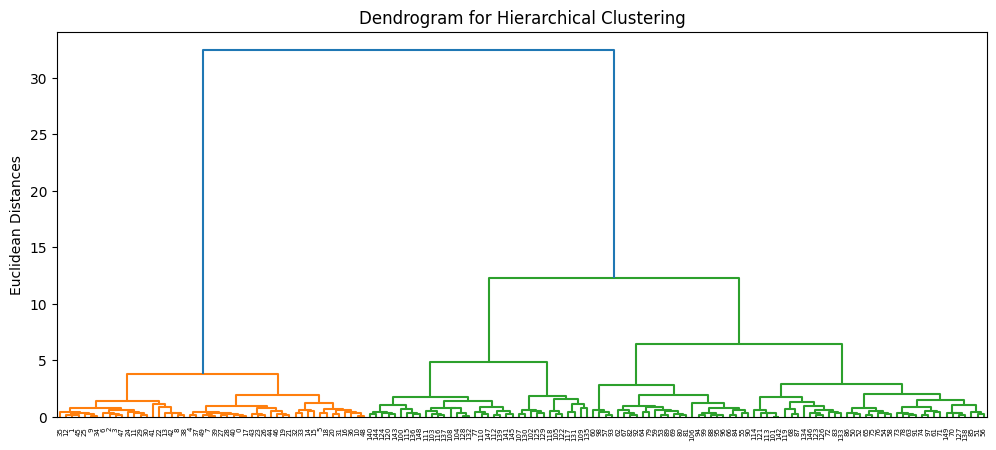

In [30]:
#Create Dendrogram
plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.ylabel('Euclidean Distances')
plt.show()

In [31]:
#Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

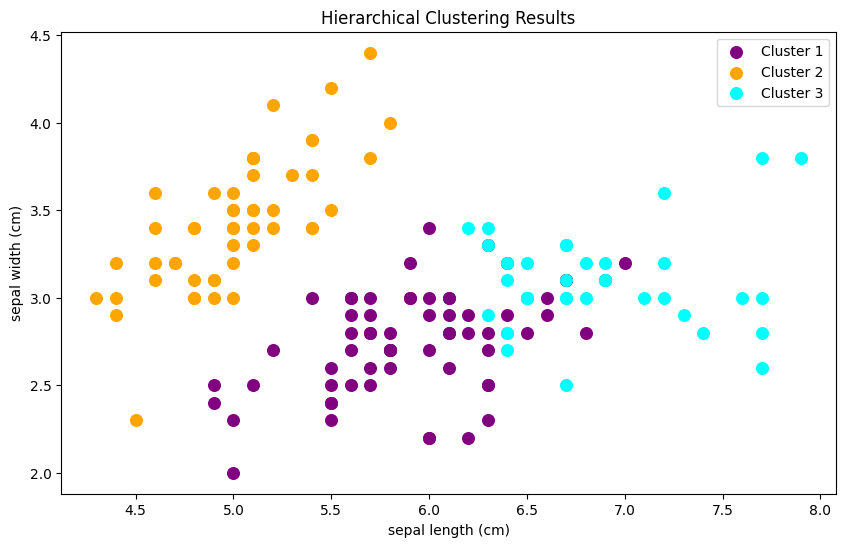

In [32]:
#Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=70, c='purple', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=70, c='orange', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=70, c='cyan', label='Cluster 3')

plt.title('Hierarchical Clustering Results')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

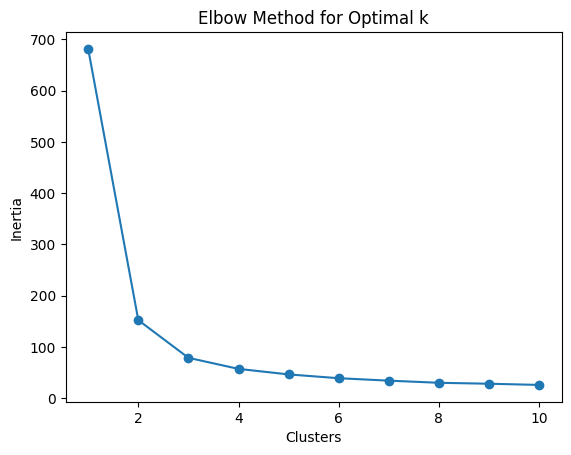

In [33]:
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()